<h2 align="center">AtliQ Hotels Data Analysis Project<h2>

## Problem Statement

#### The AtliQ Grands company is facing a major challenge from their competitors. They are loosing their Revenue and their Market share.

In [1]:
import numpy as np                     # For numerical operations 
import pandas as pd                    # For data manipulation
import seaborn as sns                  # For data visualization
from matplotlib import pyplot as plt   # For data visualization
plt.style.available                    # For creating custom styles
plt.style.use("seaborn-v0_8-pastel")
import warnings
warnings.filterwarnings('ignore')

***
### ==> 1. Data Import and Data Exploration
***

In [2]:
df_bookings = pd.read_csv(r"D:\Codebasics\Python\Project\Hospitality Analysis\datasets\fact_bookings.csv")
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920


**Explore bookings data**

In [3]:
df_bookings.shape   # number of rows and columns in a DataFrame.

(134590, 12)

### Check Unique values

In [4]:
df_bookings.room_category.unique()

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

In [5]:
df_bookings.booking_platform.unique()

array(['direct online', 'others', 'logtrip', 'tripster', 'makeyourtrip',
       'journey', 'direct offline'], dtype=object)

#### count of booking per platform

In [6]:
df_bookings.booking_platform.value_counts()

booking_platform
others            55066
makeyourtrip      26898
logtrip           14756
direct online     13379
tripster           9630
journey            8106
direct offline     6755
Name: count, dtype: int64

##### Plot count of booking per platform in Bar chart

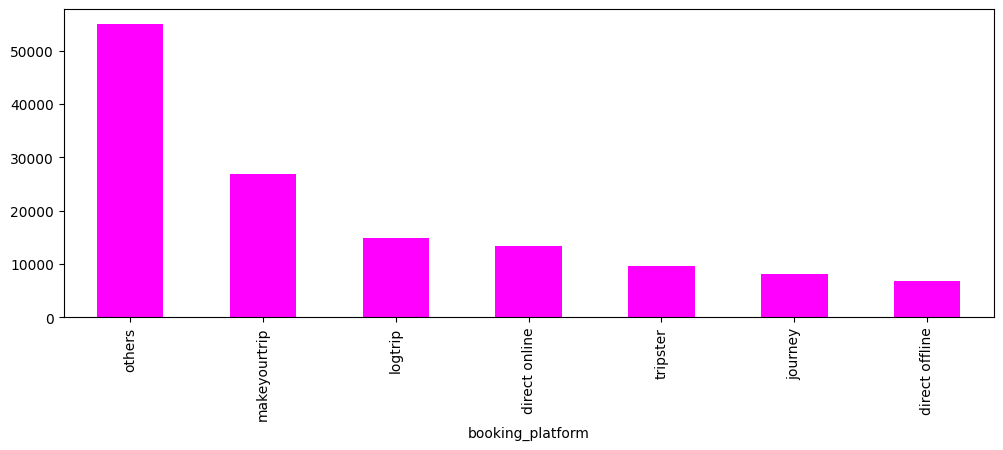

In [133]:
ax = df_bookings.booking_platform.value_counts().plot(kind = 'bar', figsize = (12,4), color = "magenta", fontsize=10 )

plt.show()

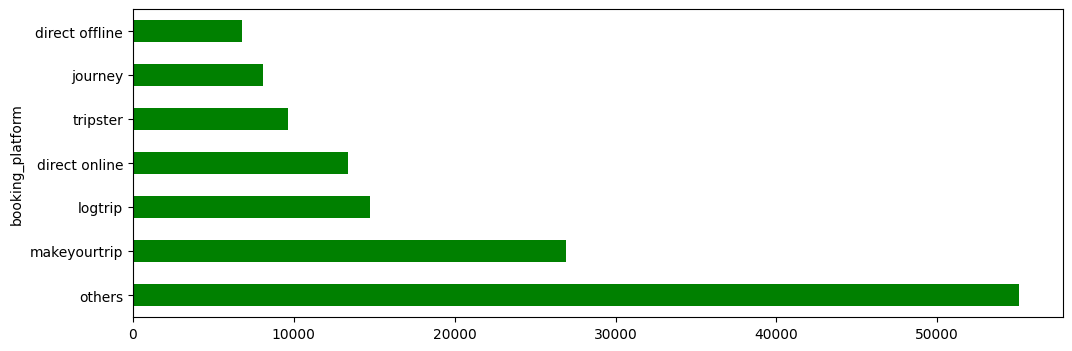

In [134]:
df_bookings.booking_platform.value_counts().plot(kind = "barh", figsize = (12,4), color = "green",  fontsize=10)
plt.show()

In [9]:
df_bookings.describe()    # For descriptive statistics of dataframe

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [10]:
df_bookings.revenue_generated.min(), df_bookings.revenue_generated.max()

(6500, 28560000)

## Load all files

In [11]:
df_date = pd.read_csv(r"D:\Codebasics\Python\Project\Hospitality Analysis\datasets\dim_date.csv")
df_hotels = pd.read_csv(r"D:\Codebasics\Python\Project\Hospitality Analysis\datasets\dim_hotels.csv")
df_rooms = pd.read_csv(r"D:\Codebasics\Python\Project\Hospitality Analysis\datasets\dim_rooms.csv")
df_agg_bookings = pd.read_csv(r"D:\Codebasics\Python\Project\Hospitality Analysis\datasets\fact_aggregated_bookings.csv")

## Explore Date data

In [12]:
df_date.shape

(92, 4)

In [13]:
df_date.head()  

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday


In [14]:
df_date.day_type.value_counts()

day_type
weekeday    65
weekend     27
Name: count, dtype: int64

## Explore Hotels data

In [15]:
df_hotels.shape

(25, 4)

In [16]:
df_hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [17]:
df_hotels.category.value_counts()

category
Luxury      16
Business     9
Name: count, dtype: int64

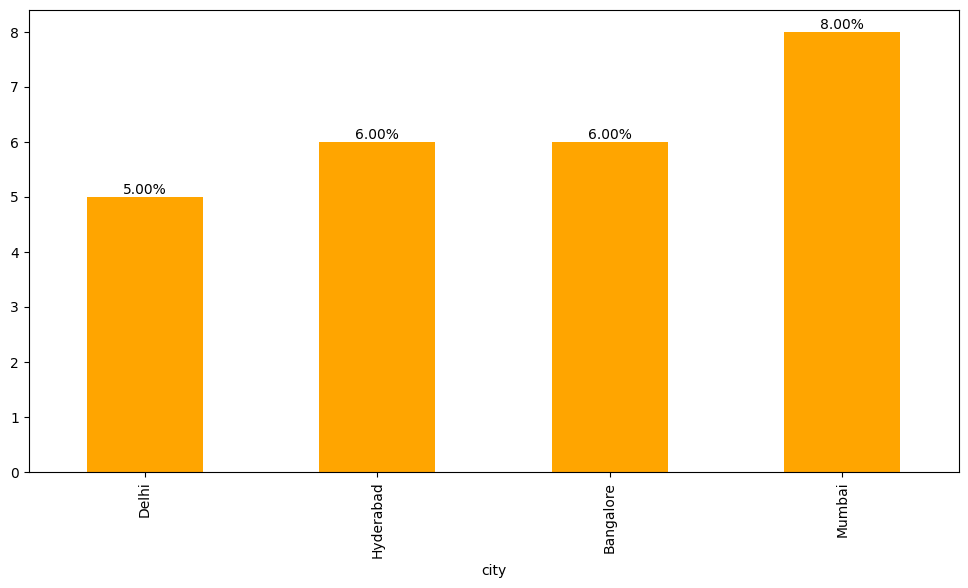

In [147]:
ax = df_hotels.city.value_counts().sort_values().plot(kind = "bar", figsize = (12,6), color = "orange")

# Adding value labels on top of each bar
plt.bar_label(ax.containers[0], fmt='%.2f%%', fontsize=10)

plt.show()

**Explore aggregate bookings**

In [19]:
df_agg_bookings.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0


#### Find out unique property ids in aggregate bookings dataset

In [20]:
df_agg_bookings.property_id.unique()

array([16559, 19562, 19563, 17558, 16558, 17560, 19558, 19560, 17561,
       16560, 16561, 16562, 16563, 17559, 17562, 17563, 18558, 18559,
       18561, 18562, 18563, 19559, 19561, 17564, 18560], dtype=int64)

#### Find out total bookings per property_id

In [21]:
df_agg_bookings.groupby("property_id")["successful_bookings"].sum()

property_id
16558    3153
16559    7338
16560    4693
16561    4418
16562    4820
16563    7211
17558    5053
17559    6142
17560    6013
17561    5183
17562    3424
17563    6337
17564    3982
18558    4475
18559    5256
18560    6638
18561    6458
18562    7333
18563    4737
19558    4400
19559    4729
19560    6079
19561    5736
19562    5812
19563    5413
Name: successful_bookings, dtype: int64

#### Find out days on which bookings are greater than capacity

In [22]:
df_agg_bookings[df_agg_bookings.successful_bookings > df_agg_bookings.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


#### Find out properties that have highest capacity

In [23]:
df_agg_bookings.capacity.max()

50.0

In [24]:
df_agg_bookings[df_agg_bookings.capacity == df_agg_bookings.capacity.max()]

,property_id,check_in_date,room_category,successful_bookings,capacity
27,17558,1-May-22,RT2,38,50.0
128,17558,2-May-22,RT2,27,50.0
229,17558,3-May-22,RT2,26,50.0
328,17558,4-May-22,RT2,27,50.0
428,17558,5-May-22,RT2,29,50.0
...,...,...,...,...,...
8728,17558,27-Jul-22,RT2,22,50.0
8828,17558,28-Jul-22,RT2,21,50.0
8928,17558,29-Jul-22,RT2,23,50.0
9028,17558,30-Jul-22,RT2,32,50.0


***
### ==> 2. Data Cleaning
***

In [25]:
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920


In [26]:
df_bookings.shape

(134590, 12)

In [27]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


### (1) Clean invalid guests

In [28]:
df_bookings[df_bookings.no_guests <= 0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
17924,May122218559RT44,18559,12/5/2022,12/5/2022,14-05-22,-10.0,RT4,direct online,NaN,No Show,20900,20900
18020,May122218561RT22,18561,8/5/2022,12/5/2022,14-05-22,-12.0,RT2,makeyourtrip,NaN,Cancelled,9000,3600
18119,May122218562RT311,18562,5/5/2022,12/5/2022,17-05-22,-6.0,RT3,direct offline,5.0,Checked Out,16800,16800
18121,May122218562RT313,18562,10/5/2022,12/5/2022,17-05-22,-4.0,RT3,direct online,NaN,Cancelled,14400,5760
56715,Jun082218562RT12,18562,5/6/2022,8/6/2022,13-06-22,-17.0,RT1,others,NaN,Checked Out,6500,6500
119765,Jul202219560RT220,19560,19-07-22,20-07-22,22-07-22,-1.0,RT2,others,NaN,Checked Out,13500,13500
134586,Jul312217564RT47,17564,30-07-22,31-07-22,1/8/2022,-4.0,RT4,logtrip,2.0,Checked Out,38760,38760


As you can see above, number of guests having less than zero value represents data error. We can ignore these records.

In [29]:
df_bookings = df_bookings[df_bookings.no_guests > 0]
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640


In [30]:
df_bookings.shape

(134578, 12)

### (2) Outlier removal in revenue generated

In [31]:
df_bookings.revenue_generated.describe()

count    1.345780e+05
mean     1.537804e+04
std      9.304015e+04
min      6.500000e+03
25%      9.900000e+03
50%      1.350000e+04
75%      1.800000e+04
max      2.856000e+07
Name: revenue_generated, dtype: float64

In [32]:
df_bookings.revenue_generated.min(), df_bookings.revenue_generated.max()

(6500, 28560000)

In [33]:
avg, std = df_bookings.revenue_generated.mean(), df_bookings.revenue_generated.std()

In [34]:
higher_limit = avg + 3 * std      # value after 3std is considered as outlier
higher_limit

294498.50173207896

In [35]:
lower_limit = avg - 3 * std
lower_limit

-263742.4278567056

In [36]:
df_bookings[df_bookings.revenue_generated < 0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized


In [37]:
df_bookings[df_bookings.revenue_generated > higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
111,May012216559RT32,16559,29-04-22,1/5/2022,2/5/2022,6.0,RT3,direct online,NaN,Checked Out,28560000,28560
315,May012216562RT22,16562,28-04-22,1/5/2022,4/5/2022,2.0,RT2,direct offline,3.0,Checked Out,12600000,12600
562,May012217559RT118,17559,26-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,2000000,4420
129176,Jul282216562RT26,16562,21-07-22,28-07-22,29-07-22,2.0,RT2,direct online,3.0,Checked Out,10000000,12600


In [38]:
df_bookings = df_bookings[df_bookings.revenue_generated <= higher_limit]
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
7,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100


In [39]:
df_bookings.shape

(134573, 12)

In [40]:
df_bookings.revenue_realized.describe()

count    134573.000000
mean      12695.983585
std        6927.791692
min        2600.000000
25%        7600.000000
50%       11700.000000
75%       15300.000000
max       45220.000000
Name: revenue_realized, dtype: float64

In [41]:
higher_limit = df_bookings.revenue_realized.mean() + 3*df_bookings.revenue_realized.std()
higher_limit

33479.358661845814

In [42]:
df_bookings[df_bookings.revenue_realized > higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
137,May012216559RT41,16559,27-04-22,1/5/2022,7/5/2022,4.0,RT4,others,NaN,Checked Out,38760,38760
139,May012216559RT43,16559,1/5/2022,1/5/2022,2/5/2022,6.0,RT4,tripster,3.0,Checked Out,45220,45220
143,May012216559RT47,16559,28-04-22,1/5/2022,3/5/2022,3.0,RT4,others,5.0,Checked Out,35530,35530
149,May012216559RT413,16559,24-04-22,1/5/2022,7/5/2022,5.0,RT4,logtrip,NaN,Checked Out,41990,41990
222,May012216560RT45,16560,30-04-22,1/5/2022,3/5/2022,5.0,RT4,others,3.0,Checked Out,34580,34580
...,...,...,...,...,...,...,...,...,...,...,...,...
134328,Jul312219560RT49,19560,31-07-22,31-07-22,2/8/2022,6.0,RT4,direct online,5.0,Checked Out,39900,39900
134331,Jul312219560RT412,19560,31-07-22,31-07-22,1/8/2022,6.0,RT4,others,2.0,Checked Out,39900,39900
134467,Jul312219562RT45,19562,28-07-22,31-07-22,1/8/2022,6.0,RT4,makeyourtrip,4.0,Checked Out,39900,39900
134474,Jul312219562RT412,19562,25-07-22,31-07-22,6/8/2022,5.0,RT4,direct offline,5.0,Checked Out,37050,37050


In [43]:
df_rooms.head()

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


One observation we can have in above dataframe is that all rooms are RT4 which means presidential suit. Now since RT4 is a luxurious room it is likely their rent will be higher. To make a fair analysis, we need to do data analysis only on RT4 room types

In [44]:
df_bookings[df_bookings.room_category == 'RT4'].revenue_realized.describe()

count    16071.000000
mean     23439.308444
std       9048.599076
min       7600.000000
25%      19000.000000
50%      26600.000000
75%      32300.000000
max      45220.000000
Name: revenue_realized, dtype: float64

In [45]:
#outlier =  mean + 3*standard deviation

23439 + 3 * 9048

50583

Here higher limit comes to be 50583 and in our dataframe above we can see that max value for revenue realized is 45220. Hence we can conclude that there is no outlier and we don't need to do any data cleaning on this particular column

In [46]:
df_bookings.isnull().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77897
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

Total values in our dataframe is 134576. Out of that 77899 rows has null rating. Since there are many rows with null rating, we should not filter these values. Also we should not replace this rating with a median or mean rating etc

#### In aggregate bookings find columns that have null values. Fill these null values

In [47]:
df_agg_bookings.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               2
dtype: int64

In [48]:
df_agg_bookings[df_agg_bookings.capacity.isna()]

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,1-May-22,RT1,22,NaN
14,17562,1-May-22,RT1,12,NaN


In [49]:
df_agg_bookings.capacity.value_counts()

capacity
30.0    552
19.0    552
18.0    460
29.0    460
40.0    460
20.0    459
16.0    368
27.0    368
6.0     368
24.0    368
7.0     276
45.0    276
23.0    276
34.0    276
38.0    276
25.0    276
41.0    276
26.0    275
36.0    184
15.0    184
39.0    184
44.0    184
32.0    184
21.0    184
14.0    184
3.0     184
9.0      92
17.0     92
13.0     92
10.0     92
43.0     92
8.0      92
22.0     92
50.0     92
33.0     92
42.0     92
31.0     92
4.0      92
Name: count, dtype: int64

In [50]:
df_agg_bookings.capacity.mean()

25.280495759947815

In [51]:
df_agg_bookings.capacity.fillna(df_agg_bookings.capacity.mean(), inplace = True)

In [52]:
df_agg_bookings.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               0
dtype: int64

#### In aggregate bookings find out records that have successful_bookings value greater than capacity.

In [53]:
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0


In [54]:
df_agg_bookings[df_agg_bookings.successful_bookings > df_agg_bookings.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


In [55]:
df_agg_bookings.shape

(9200, 5)

In [56]:
df_agg_bookings[df_agg_bookings.successful_bookings <= df_agg_bookings.capacity].shape

(9194, 5)

***
### ==> 3. Data Transformation
***

In [57]:
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0


### Create occupancy percentage column

In [58]:
df_agg_bookings["occ_pct"] = df_agg_bookings.successful_bookings / df_agg_bookings.capacity
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,0.833333
1,19562,1-May-22,RT1,28,30.0,0.933333
2,19563,1-May-22,RT1,23,30.0,0.766667
3,17558,1-May-22,RT1,30,19.0,1.578947
4,16558,1-May-22,RT1,18,19.0,0.947368


In [59]:
df_agg_bookings["occ_pct"] = round(df_agg_bookings.successful_bookings * 100 / df_agg_bookings.capacity, 2)
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,83.33
1,19562,1-May-22,RT1,28,30.0,93.33
2,19563,1-May-22,RT1,23,30.0,76.67
3,17558,1-May-22,RT1,30,19.0,157.89
4,16558,1-May-22,RT1,18,19.0,94.74


There are various types of data transformations that you may have to perform based on the need. Few examples of data transformations are,

1. Creating new columns
1. Normalization
1. Merging data
1. Aggregation

***
### ==> 4. Insights Generation
***

# Exploratory Data Analysis

In [60]:
df_agg_bookings.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,83.33
1,19562,1-May-22,RT1,28,30.0,93.33
2,19563,1-May-22,RT1,23,30.0,76.67
3,17558,1-May-22,RT1,30,19.0,157.89


### Problem 1 - What is an average occupacy rate in each of the room categories?

In [61]:
df_agg_bookings.groupby('room_category')['occ_pct'].mean().round(2)

room_category
RT1    58.23
RT2    58.04
RT3    58.03
RT4    59.30
Name: occ_pct, dtype: float64

In [62]:
df_rooms

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


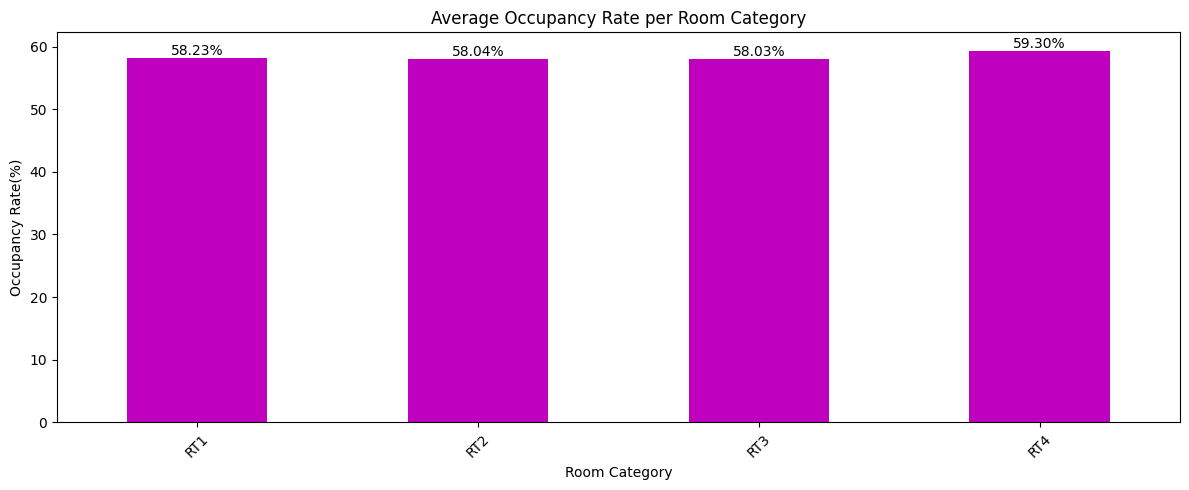

In [148]:
ax = df_agg_bookings.groupby('room_category')['occ_pct'].mean().round(2).plot(kind = "bar", color= "m", figsize = (12,5))

# Setting chart title and labels
plt.title("Average Occupancy Rate per Room Category")
plt.ylabel("Occupancy Rate(%)")
plt.xlabel("Room Category")
# Adding value labels on top of each bar
plt.bar_label(ax.containers[0], fmt='%.2f%%', fontsize=10)

plt.xticks(rotation = 45)   #Rotate the x-axis tick labels
plt.tight_layout()    # adjust subplot parameters to provide a tight layout, minimizing overlaps between subplots, labels, titles, and other plot elements. 
plt.show()    #displays the plot 

 ➡️ RT4 (Presidential) rooms showed the highest occupancy percentages(59.30%), reflecting strong guest preference for premium room categories.

### while merging the dataframe if column name is not same
- use left on
- and right on

In [64]:
df = pd.merge(df_agg_bookings, df_rooms, left_on= 'room_category', right_on = 'room_id')
df.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_id,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,RT1,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,RT1,Standard
2,19563,1-May-22,RT1,23,30.0,76.67,RT1,Standard
3,17558,1-May-22,RT1,30,19.0,157.89,RT1,Standard


In [65]:
df.groupby('room_class')['occ_pct'].mean().round(2)

room_class
Elite           58.04
Premium         58.03
Presidential    59.30
Standard        58.23
Name: occ_pct, dtype: float64

In [66]:
df[df.room_class == 'Standard'].occ_pct.mean()

58.232091304347826

In [67]:
df.drop('room_id', axis = 1, inplace=True)

In [68]:
df.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,Standard
2,19563,1-May-22,RT1,23,30.0,76.67,Standard
3,17558,1-May-22,RT1,30,19.0,157.89,Standard


### Problem 2 - Average occupancy rate per city

In [69]:
df_hotels.head(3)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi


In [70]:
df.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,Standard
2,19563,1-May-22,RT1,23,30.0,76.67,Standard


In [71]:
df = pd.merge(df_hotels, df, on = 'property_id')
df.head(4)

,property_id,property_name,category,city,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class
0,16558,Atliq Grands,Luxury,Delhi,1-May-22,RT1,18,19.0,94.74,Standard
1,16558,Atliq Grands,Luxury,Delhi,2-May-22,RT1,12,19.0,63.16,Standard
2,16558,Atliq Grands,Luxury,Delhi,3-May-22,RT1,14,19.0,73.68,Standard
3,16558,Atliq Grands,Luxury,Delhi,4-May-22,RT1,13,19.0,68.42,Standard


In [72]:
df.groupby("city")["occ_pct"].mean().round(2).sort_values(ascending = False)

city
Delhi        61.61
Hyderabad    58.14
Mumbai       57.94
Bangalore    56.59
Name: occ_pct, dtype: float64

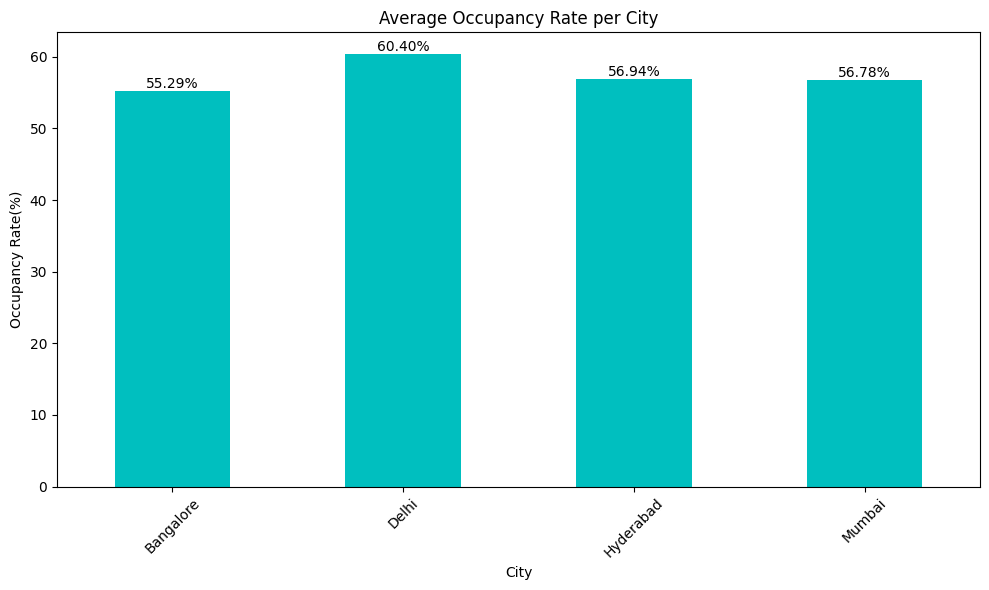

In [145]:
ax = df.groupby("city")["occ_pct"].mean().round(2).plot(kind = "bar", figsize = (10,6), color = 'c')

# Setting chart title and labels
plt.title("Average Occupancy Rate per City")
plt.ylabel("Occupancy Rate(%)")
plt.xlabel("City")

# Adding value labels on top of each bar
plt.bar_label(ax.containers[0], fmt='%.2f%%', fontsize=10)

plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

➡️ Delhi leads with the highest occupacy rate (61.61%) while Bangalore lags behind at 56.59%.

### Problem 3 - Top room category by city

In [74]:
df_hotels.head(3)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi


In [75]:
df_bookings.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100


In [76]:
df1 = pd.merge(df_hotels, df_bookings, on = "property_id")
df1.head(3)

,property_id,property_name,category,city,booking_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,16558,Atliq Grands,Luxury,Delhi,May012216558RT12,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
1,16558,Atliq Grands,Luxury,Delhi,May012216558RT15,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
2,16558,Atliq Grands,Luxury,Delhi,May012216558RT16,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100


In [77]:
df_room_by_city = df1.groupby(["room_category", "city"])["no_guests"].count()
df_room_by_city

room_category  city     
RT1            Bangalore     9444
               Delhi         7941
               Hyderabad     9835
               Mumbai       11221
RT2            Bangalore    11717
               Delhi         8855
               Hyderabad    11643
               Mumbai       17285
RT3            Bangalore     7914
               Delhi         4867
               Hyderabad     8075
               Mumbai        9705
RT4            Bangalore     2940
               Delhi         2560
               Hyderabad     5330
               Mumbai        5241
Name: no_guests, dtype: int64

In [78]:
df_rooms

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


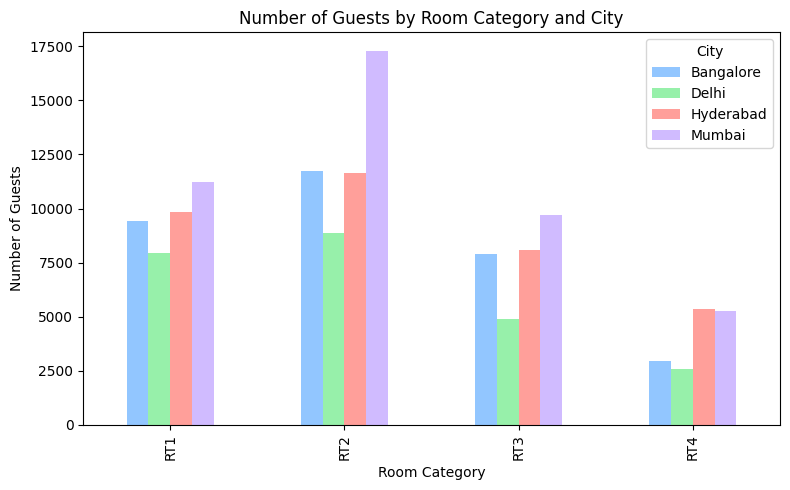

In [150]:
df_pivot = df_room_by_city.unstack(fill_value=0)

ax = df_pivot.plot(kind='bar', figsize = (8,5), fontsize = 10)

# Set chart title and labels
ax.set_title('Number of Guests by Room Category and City')
ax.set_xlabel('Room Category')
ax.set_ylabel('Number of Guests')
# Add legend
plt.legend(title='City')

# Display the plot
plt.tight_layout()
plt.show()

➡️ RT2 is the most preferred room type in all cities<br>
➡️ Mumbai leads in RT2(Elite) bookings with over 17000 guests<br>
➡️ RT1(Standard) rooms consistently rank second across locations<br>
➡️ RT4(Presidential) rooms show the lowest demand overall

### Problem 4 -  When was the occupacy better? Weekend or Weekday?

In [80]:
df_date.head(3)

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday


In [81]:
df.head(3)

,property_id,property_name,category,city,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class
0,16558,Atliq Grands,Luxury,Delhi,1-May-22,RT1,18,19.0,94.74,Standard
1,16558,Atliq Grands,Luxury,Delhi,2-May-22,RT1,12,19.0,63.16,Standard
2,16558,Atliq Grands,Luxury,Delhi,3-May-22,RT1,14,19.0,73.68,Standard


In [82]:
df = pd.merge(df_date, df, left_on = "date", right_on = "check_in_date")
df.head(3)

,date,mmm yy,week no,day_type,property_id,property_name,category,city,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class
0,10-May-22,May 22,W 20,weekeday,16558,Atliq Grands,Luxury,Delhi,10-May-22,RT1,10,19.0,52.63,Standard
1,10-May-22,May 22,W 20,weekeday,16558,Atliq Grands,Luxury,Delhi,10-May-22,RT2,12,22.0,54.55,Elite
2,10-May-22,May 22,W 20,weekeday,16558,Atliq Grands,Luxury,Delhi,10-May-22,RT3,4,8.0,50.00,Premium


In [83]:
df.drop("date", axis = 1, inplace =True)
df.head(3)

,mmm yy,week no,day_type,property_id,property_name,category,city,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class
0,May 22,W 20,weekeday,16558,Atliq Grands,Luxury,Delhi,10-May-22,RT1,10,19.0,52.63,Standard
1,May 22,W 20,weekeday,16558,Atliq Grands,Luxury,Delhi,10-May-22,RT2,12,22.0,54.55,Elite
2,May 22,W 20,weekeday,16558,Atliq Grands,Luxury,Delhi,10-May-22,RT3,4,8.0,50.00,Premium


In [84]:
occ_pct_by_day = df.groupby("day_type") ["occ_pct"].mean().round(2)
occ_pct_by_day

day_type
weekeday    50.90
weekend     72.39
Name: occ_pct, dtype: float64

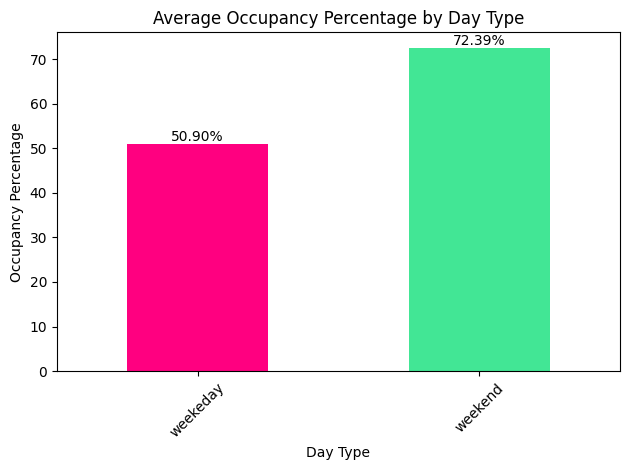

In [152]:
# Creating the bar chart
ax = occ_pct_by_day.plot(kind='bar', color = ["#FF0080", "#42E695"])

# Adding value labels on top of each bar
ax.bar_label(ax.containers[0], fmt='%.2f%%', fontsize=10)

# Setting chart title and labels
ax.set_title("Average Occupancy Percentage by Day Type")
ax.set_ylabel("Occupancy Percentage")
ax.set_xlabel("Day Type")

plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

➡️ Weekend show significantly higher occupacy(72.39%) compared to weekdays(50.90%).

### Problem 5 - What does booking status tell us about customer behaviour?

In [86]:
df_bookings.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100


In [87]:
total_revenue_realized = df_bookings.groupby("booking_status")["revenue_realized"].count()
total_revenue_realized

booking_status
Cancelled      33416
Checked Out    94399
No Show         6758
Name: revenue_realized, dtype: int64

In [88]:
labels = total_revenue_realized.index
labels

Index(['Cancelled', 'Checked Out', 'No Show'], dtype='object', name='booking_status')

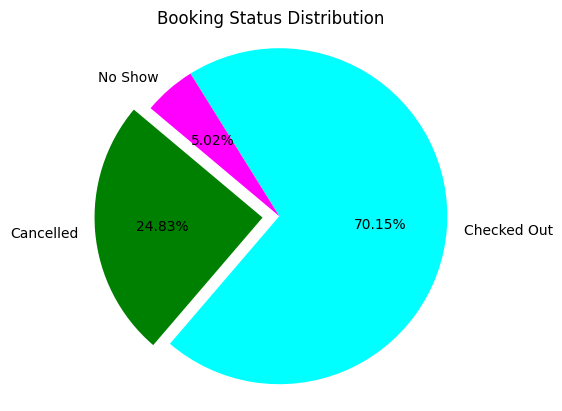

In [154]:
plt.pie(total_revenue_realized, labels = total_revenue_realized.index, autopct = "%1.2f%%", 
        explode = (0.1, 0, 0),  startangle = 140, colors = ["g", "cyan", "magenta"])
plt.title("Booking Status Distribution")
plt.axis('equal')  # Ensures pie is a circle
plt.show()

➡️ Checked Out : 70.15%<br>
➡️ Cancelled : 24.83%<br>
➡️ No Show : 5.02%

### Problem 6 - In the month of June, what is the occupacy for different cities

In [90]:
df["mmm yy"].unique()

array(['May 22', 'Jun 22', 'Jul 22'], dtype=object)

In [91]:
df_june_22 = df[df["mmm yy"] == "Jun 22"]
df_june_22.head(4)

,mmm yy,week no,day_type,property_id,property_name,category,city,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class
2200,Jun 22,W 24,weekeday,16558,Atliq Grands,Luxury,Delhi,10-Jun-22,RT1,11,19.0,57.89,Standard
2201,Jun 22,W 24,weekeday,16558,Atliq Grands,Luxury,Delhi,10-Jun-22,RT2,16,22.0,72.73,Elite
2202,Jun 22,W 24,weekeday,16558,Atliq Grands,Luxury,Delhi,10-Jun-22,RT3,6,8.0,75.00,Premium
2203,Jun 22,W 24,weekeday,16558,Atliq Grands,Luxury,Delhi,10-Jun-22,RT4,3,3.0,100.00,Presidential


In [92]:
df_june_22.groupby("city")["occ_pct"].mean().round(2).sort_values(ascending = False)

city
Delhi        62.47
Hyderabad    58.46
Mumbai       58.38
Bangalore    56.58
Name: occ_pct, dtype: float64

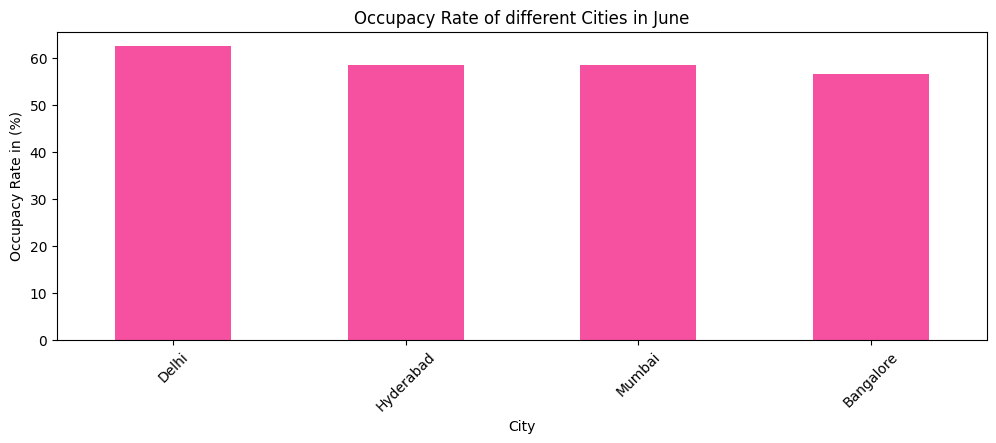

In [156]:
df_june_22.groupby("city")["occ_pct"].mean().round(2).sort_values(ascending = False).plot(
    kind = "bar", figsize = (12,4), color = "#F650A0", fontsize = 10)

plt.title("Occupacy Rate of different Cities in June")
plt.xlabel("City")
plt.ylabel("Occupacy Rate in (%)")

plt.xticks(rotation = 45)
plt.show()

➡️ On an average in the month of June, Delhi is performing well with the occupacy rate (62.47%) while the Bangalore occupacy rate is lower (56.58%).

**We got new data for the month of august. Append that to existing data**

In [94]:
df_august = pd.read_csv(r"D:\Codebasics\Python\Project\Hospitality Analysis\datasets\new_data_august.csv")
df_august.head(3)

,property_id,property_name,category,city,room_category,room_class,check_in_date,mmm yy,week no,day_type,successful_bookings,capacity,occ%
0,16559,Atliq Exotica,Luxury,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,30,100.00
1,19562,Atliq Bay,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,21,30,70.00
2,19563,Atliq Palace,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,23,30,76.67


In [95]:
df_august.shape

(7, 13)

In [96]:
df.head(3)

,mmm yy,week no,day_type,property_id,property_name,category,city,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class
0,May 22,W 20,weekeday,16558,Atliq Grands,Luxury,Delhi,10-May-22,RT1,10,19.0,52.63,Standard
1,May 22,W 20,weekeday,16558,Atliq Grands,Luxury,Delhi,10-May-22,RT2,12,22.0,54.55,Elite
2,May 22,W 20,weekeday,16558,Atliq Grands,Luxury,Delhi,10-May-22,RT3,4,8.0,50.00,Premium


In [97]:
df.shape

(6500, 13)

In [98]:
latest_df = pd.concat([df, df_august], axis = 0, ignore_index = True)
latest_df.tail(10)

,mmm yy,week no,day_type,property_id,property_name,category,city,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,occ%
6497,Jul 22,W 32,weekend,17564,Atliq Seasons,Business,Mumbai,31-Jul-22,RT2,19,40.0,47.50,Elite,NaN
6498,Jul 22,W 32,weekend,17564,Atliq Seasons,Business,Mumbai,31-Jul-22,RT3,11,24.0,45.83,Premium,NaN
6499,Jul 22,W 32,weekend,17564,Atliq Seasons,Business,Mumbai,31-Jul-22,RT4,10,17.0,58.82,Presidential,NaN
6500,Aug-22,W 32,weekeday,16559,Atliq Exotica,Luxury,Mumbai,01-Aug-22,RT1,30,30.0,NaN,Standard,100.00
6501,Aug-22,W 32,weekeday,19562,Atliq Bay,Luxury,Bangalore,01-Aug-22,RT1,21,30.0,NaN,Standard,70.00
6502,Aug-22,W 32,weekeday,19563,Atliq Palace,Business,Bangalore,01-Aug-22,RT1,23,30.0,NaN,Standard,76.67
6503,Aug-22,W 32,weekeday,19558,Atliq Grands,Luxury,Bangalore,01-Aug-22,RT1,30,40.0,NaN,Standard,75.00
6504,Aug-22,W 32,weekeday,19560,Atliq City,Business,Bangalore,01-Aug-22,RT1,20,26.0,NaN,Standard,76.92
6505,Aug-22,W 32,weekeday,17561,Atliq Blu,Luxury,Mumbai,01-Aug-22,RT1,18,26.0,NaN,Standard,69.23
6506,Aug-22,W 32,weekeday,17564,Atliq Seasons,Business,Mumbai,01-Aug-22,RT1,10,16.0,NaN,Standard,62.50


In [99]:
latest_df.shape

(6507, 14)

### Problem 7 - Revenue realized per city

In [100]:
df_bookings.head(4)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640


In [101]:
df_hotels.head(4)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi


In [102]:
df_bookings_all = pd.merge(df_bookings, df_hotels, on = "property_id")
df_bookings_all.head(4)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi


In [103]:
df_bookings_all.groupby("city")["revenue_realized"].sum().sort_values(ascending = False)

city
Mumbai       668569251
Bangalore    420383550
Hyderabad    325179310
Delhi        294404488
Name: revenue_realized, dtype: int64

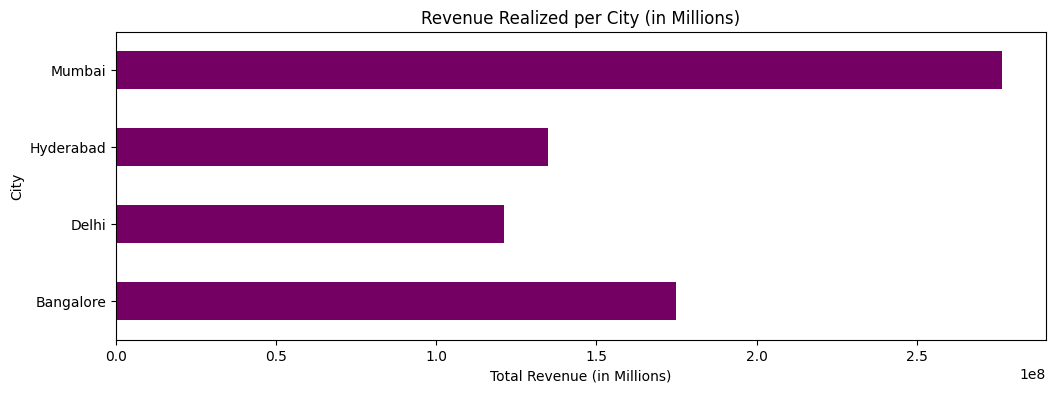

In [158]:
df_bookings_all.groupby("city")["revenue_realized"].sum().plot(
    kind = "barh", figsize = (12,4), color = "#730062", fontsize = 10)

plt.title("Revenue Realized per City (in Millions)")
plt.xlabel("Total Revenue (in Millions)")
plt.ylabel("City")
plt.show()

➡️ Mumbai generates highest Revenue, followed by Bangalore, Hyderabad and Delhi.

### Problem 8 - Month by Month Renvenue

In [105]:
df_date.head(4)

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday


In [106]:
df_date["mmm yy"].unique()

array(['May 22', 'Jun 22', 'Jul 22'], dtype=object)

In [107]:
df_bookings_all.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
4,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100,Atliq Grands,Luxury,Delhi


In [108]:
latest_df.head(4)

,mmm yy,week no,day_type,property_id,property_name,category,city,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,occ%
0,May 22,W 20,weekeday,16558,Atliq Grands,Luxury,Delhi,10-May-22,RT1,10,19.0,52.63,Standard,NaN
1,May 22,W 20,weekeday,16558,Atliq Grands,Luxury,Delhi,10-May-22,RT2,12,22.0,54.55,Elite,NaN
2,May 22,W 20,weekeday,16558,Atliq Grands,Luxury,Delhi,10-May-22,RT3,4,8.0,50.00,Premium,NaN
3,May 22,W 20,weekeday,16558,Atliq Grands,Luxury,Delhi,10-May-22,RT4,2,3.0,66.67,Presidential,NaN


In [109]:
latest_df["mmm yy"].unique()

array(['May 22', 'Jun 22', 'Jul 22', 'Aug-22'], dtype=object)

In [110]:
pd.merge(df_bookings_all, df_date, left_on="check_in_date", right_on="date")

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,date,mmm yy,week no,day_type


- here we got no records because the dtype of check in date is object
- we have to convert object dtype into date dtype

In [111]:
df_bookings_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134573 entries, 0 to 134572
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         134573 non-null  object 
 1   property_id        134573 non-null  int64  
 2   booking_date       134573 non-null  object 
 3   check_in_date      134573 non-null  object 
 4   checkout_date      134573 non-null  object 
 5   no_guests          134573 non-null  float64
 6   room_category      134573 non-null  object 
 7   booking_platform   134573 non-null  object 
 8   ratings_given      56676 non-null   float64
 9   booking_status     134573 non-null  object 
 10  revenue_generated  134573 non-null  int64  
 11  revenue_realized   134573 non-null  int64  
 12  property_name      134573 non-null  object 
 13  category           134573 non-null  object 
 14  city               134573 non-null  object 
dtypes: float64(2), int64(3), object(10)
memory usage: 1

In [112]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      92 non-null     object
 1   mmm yy    92 non-null     object
 2   week no   92 non-null     object
 3   day_type  92 non-null     object
dtypes: object(4)
memory usage: 3.0+ KB


- here we got no records because the dtype of check in date is object
- we have to convert object dtype into date dtype

In [113]:
df_bookings_all["check_in_date"] = pd.to_datetime(df_bookings_all["check_in_date"], dayfirst=True, errors='coerce')
df_bookings_all["check_in_date"]

0        2022-05-01
1        2022-05-01
2        2022-05-01
3        2022-05-01
4        2022-05-01
            ...    
134568          NaT
134569          NaT
134570          NaT
134571          NaT
134572          NaT
Name: check_in_date, Length: 134573, dtype: datetime64[ns]

In [114]:
df_date["date"] = pd.to_datetime(df_date["date"])
df_date["date"]

0    2022-05-01
1    2022-05-02
2    2022-05-03
3    2022-05-04
4    2022-05-05
        ...    
87   2022-07-27
88   2022-07-28
89   2022-07-29
90   2022-07-30
91   2022-07-31
Name: date, Length: 92, dtype: datetime64[ns]

In [115]:
df_bookings_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134573 entries, 0 to 134572
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   booking_id         134573 non-null  object        
 1   property_id        134573 non-null  int64         
 2   booking_date       134573 non-null  object        
 3   check_in_date      55790 non-null   datetime64[ns]
 4   checkout_date      134573 non-null  object        
 5   no_guests          134573 non-null  float64       
 6   room_category      134573 non-null  object        
 7   booking_platform   134573 non-null  object        
 8   ratings_given      56676 non-null   float64       
 9   booking_status     134573 non-null  object        
 10  revenue_generated  134573 non-null  int64         
 11  revenue_realized   134573 non-null  int64         
 12  property_name      134573 non-null  object        
 13  category           134573 non-null  object  

In [116]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      92 non-null     datetime64[ns]
 1   mmm yy    92 non-null     object        
 2   week no   92 non-null     object        
 3   day_type  92 non-null     object        
dtypes: datetime64[ns](1), object(3)
memory usage: 3.0+ KB


In [117]:
df_bookings_all = pd.merge(df_bookings_all, df_date, left_on = "check_in_date", right_on = "date")
df_bookings_all.head(4)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,date,mmm yy,week no,day_type
0,May012216558RT12,16558,30-04-22,2022-05-01,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend
1,May012216558RT15,16558,27-04-22,2022-05-01,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend
2,May012216558RT16,16558,1/5/2022,2022-05-01,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend
3,May012216558RT17,16558,28-04-22,2022-05-01,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi,2022-05-01,May 22,W 19,weekend


In [118]:
df_bookings_all.columns

Index(['booking_id', 'property_id', 'booking_date', 'check_in_date',
       'checkout_date', 'no_guests', 'room_category', 'booking_platform',
       'ratings_given', 'booking_status', 'revenue_generated',
       'revenue_realized', 'property_name', 'category', 'city', 'date',
       'mmm yy', 'week no', 'day_type'],
      dtype='object')

In [119]:
df_total_bookings = df_bookings_all.groupby('mmm yy')['revenue_realized'].sum()
df_total_bookings

mmm yy
Jul 22    243180932
Jun 22    229637640
May 22    234353183
Name: revenue_realized, dtype: int64

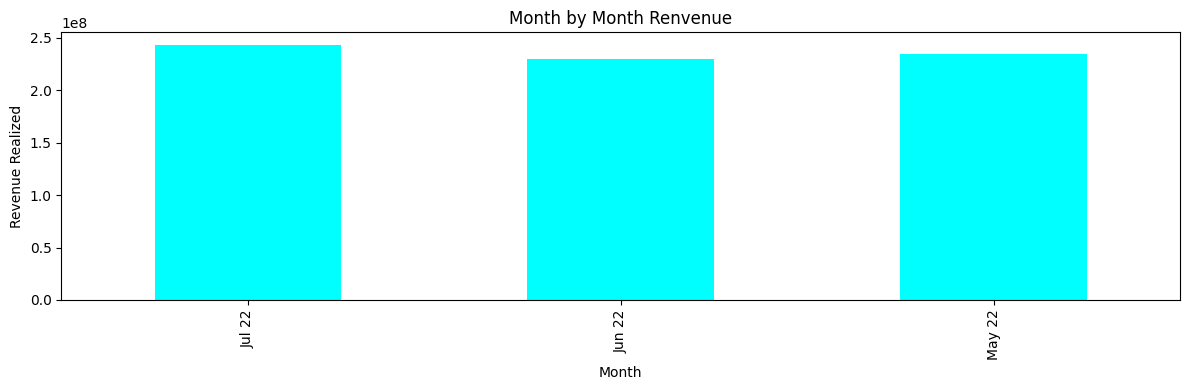

In [160]:
df_bookings_all.groupby('mmm yy')['revenue_realized'].sum().plot(
    kind = "bar", figsize = (12,4), color = "cyan", fontsize=10)
plt.title("Month by Month Renvenue")
plt.xlabel("Month")
plt.ylabel("Revenue Realized")
plt.tight_layout()
plt.show()

➡️ July 22 has the highest Revenue, followed by May 22 and June 22

### Problem 8 - Revenue Realized per Hotel Type

In [121]:
df_bookings_all["property_name"].unique()

array(['Atliq Grands', 'Atliq Exotica', 'Atliq City', 'Atliq Blu',
       'Atliq Bay', 'Atliq Palace', 'Atliq Seasons'], dtype=object)

In [122]:
df_bookings_all.groupby("property_name")["revenue_realized"].sum().sort_values()

property_name
Atliq Seasons     26838223
Atliq Grands      87245939
Atliq Bay        107516312
Atliq Blu        108108129
Atliq City       118290783
Atliq Palace     125553143
Atliq Exotica    133619226
Name: revenue_realized, dtype: int64

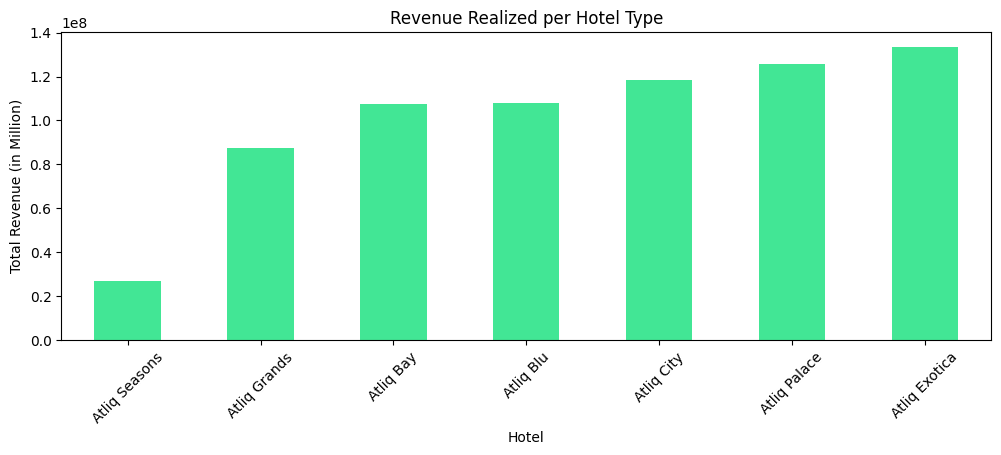

In [161]:
df_bookings_all.groupby("property_name")["revenue_realized"].sum().sort_values().plot(
    kind = "bar", figsize = (12,4), color = "#42E695", fontsize = 10)
plt.title("Revenue Realized per Hotel Type")
plt.xlabel("Hotel")
plt.ylabel("Total Revenue (in Million)")
plt.xticks(rotation = 45)
plt.show() 

➡️ Hotel Atliq Exotica and Atliq Palace generates higher Revenue while hotel Atliq Seasons generates lower Revenue

### Problem 9 - Average rating per City

In [124]:
df_bookings_all.groupby("city")["ratings_given"].mean().sort_values(ascending = False).round(2)

city
Delhi        3.79
Mumbai       3.66
Hyderabad    3.65
Bangalore    3.41
Name: ratings_given, dtype: float64

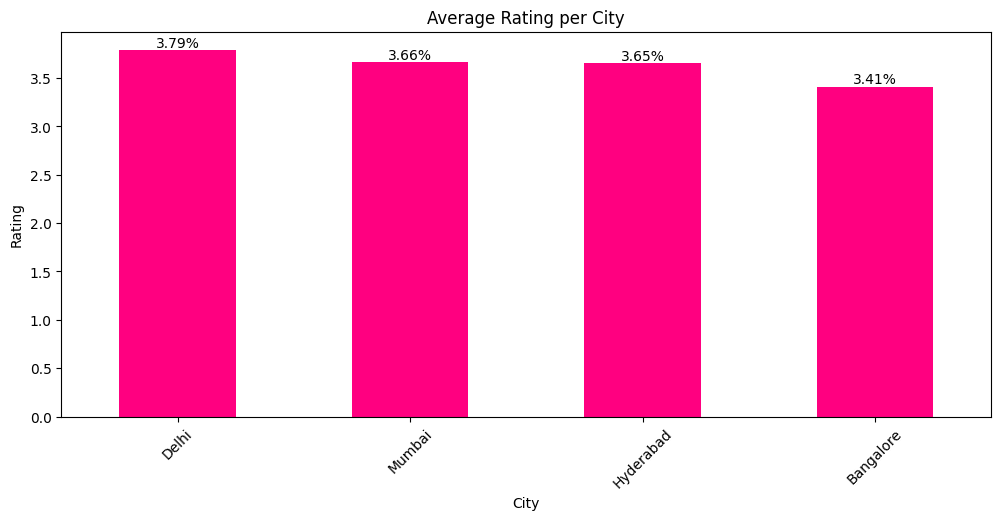

In [163]:
ax = df_bookings_all.groupby("city")["ratings_given"].mean().sort_values(ascending = False).round(2).plot(
    kind = "bar", figsize = (12,5), color = "#FF0080")
# Adding value labels on top of each bar
ax.bar_label(ax.containers[0], fmt='%.2f%%', fontsize=10)
plt.title("Average Rating per City")
plt.xlabel("City")
plt.ylabel("Rating")
plt.xticks(rotation = 45)
plt.show() 

➡️ There is Highest Rating in Delhi city (3.79) followed by Mumbai, Hyderabad and Bangalore

### Problem 10 - Revenue Realized per booking platform

In [126]:
revenue_by_platform = df_bookings_all.groupby("booking_platform")["revenue_realized"].sum()
revenue_by_platform

booking_platform
direct offline     36062554
direct online      69192560
journey            42057593
logtrip            77063046
makeyourtrip      141715653
others            290919483
tripster           50160866
Name: revenue_realized, dtype: int64

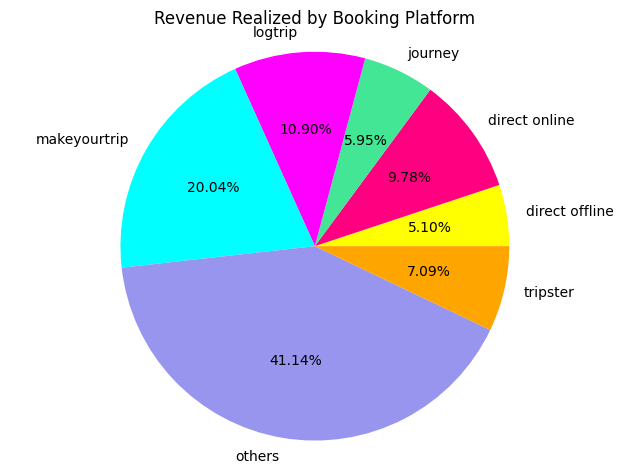

In [127]:
revenue_by_platform.plot(
    kind='pie',
    autopct='%1.2f%%',  # Display percentages with two decimal places
    ylabel='',          # Remove the y-axis label
    title='Revenue Realized by Booking Platform',  # Set the chart title
    colors = ["yellow", "#FF0080", "#42E695", "magenta", "cyan", "#9895ef", "orange"]
)

plt.tight_layout()  # Adjust layout to prevent clipping
plt.axis('equal')  # Ensures pie is a circle
plt.show()

➡️ Most of the bookings come from indirect channels like others and makeyourtrip

# Insights:

▶️ RT2 (Elite) is the top choice, especially in Mumbai; RT1 (Standard) ranks second; RT4 (Presidential) sees the least demand.

▶️ Delhi leads with 61.61% occupancy; Bangalore trails at 56.59%.

▶️ Weekends showed higher guest traffic (72.39%) than weekdays (50.90%).

▶️ Mumbai generates the highest revenue; peak months were July, May, and June 2022.

▶️ Delhi scores highest in guest satisfaction (3.79), followed by Mumbai, Hyderabad, and Bangalore.

▶️ Most of the bookings come from indirect channels like others and makeyourtrip

# Recommendations:


##### 🏨 Room Type Strategy

- Offer bundled packages (e.g., complimentary breakfast, spa access) to enhance value.
- Offer add-on services (e.g., late check-out, room upgrades) to increase revenue per booking.

##### 📍 City-Specific Strategies

- Identify potential barriers to bookings, such as pricing or location, and address them.
- Consider partnerships with local tech companies to offer corporate packages.


##### 📅 Temporal Occupancy Optimization

- Promote remote work packages, including extended stays with workspace facilities.
- Offer themed events or activities to enhance the guest experience.

##### 📈 Booking Outcome Management

- Implement flexible cancellation policies to encourage bookings while minimizing last-minute cancellations.
- Address negative reviews promptly to demonstrate commitment to guest satisfaction.

##### 💰 Revenue Enhancement Strategies

- Offer ancillary services such as spa treatments, dining experiences, or guided tours.
- Explore hosting events or conferences to utilize space during off-peak periods.

##### 🌐 Booking Channel Optimization

- Enhancing the hotel website's user experience and mobile optimization.
- Offering exclusive deals or perks for direct bookings.